# Optimization



## Constrained optimization



[Matlab post](http://matlab.cheme.cmu.edu/2011/12/24/constrained-optimization/)

adapted from [http://en.wikipedia.org/wiki/Lagrange_multipliers](http://en.wikipedia.org/wiki/Lagrange_multipliers).

Suppose we seek to minimize the function $f(x,y)=x+y$ subject to the constraint that $x^2 + y^2 = 1$. The function we seek to maximize is an unbounded plane, while the constraint is a unit circle. We could setup a Lagrange multiplier approach to solving this problem, but we will use a constrained optimization approach instead.



In [1]:
from scipy.optimize import fmin_slsqp


def objective(X):
    x, y = X
    return x + y


def eqc(X):
    "equality constraint"
    x, y = X
    return x**2 + y**2 - 1.0


X0 = [-1, -1]
X = fmin_slsqp(objective, X0, eqcons=[eqc])
print(X)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -1.414213562374664
            Iterations: 5
            Function evaluations: 15
            Gradient evaluations: 5
[-0.70710678 -0.70710678]


## Finding the maximum power of a photovoltaic device.



A photovoltaic device is characterized by a current-voltage relationship. Let us say, for argument's sake, that the relationship is known and defined by

$i = 0.5 - 0.5 * V^2$

The voltage is highest when the current is equal to zero, but of course then you get no power. The current is highest when the voltage is zero, i.e. short-circuited, but there is again no power. We seek the highest power condition, which is to find the maximum of $i V$. This is a constrained optimization. We solve it by creating an objective function that returns the negative of (\i V\\), and then find the minimum.

First, let us examine the i-V relationship.



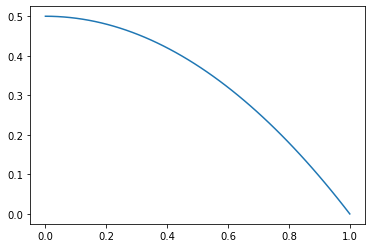

In [2]:
import matplotlib.pyplot as plt
import numpy as np

V = np.linspace(0, 1)


def i(V):
    return 0.5 - 0.5 * V**2


plt.figure()
plt.plot(V, i(V));

Now, let us be sure there is a maximum in power.



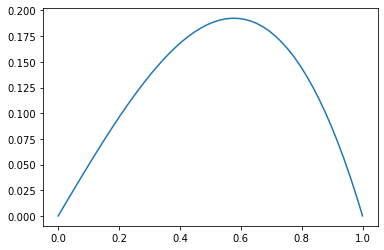

In [3]:
import matplotlib.pyplot as plt
import numpy as np

V = np.linspace(0, 1)


def i(V):
    return 0.5 - 0.5 * V**2


plt.plot(V, i(V) * V);

You can see in fact there is a maximum, near V=0.6. We could solve this problem analytically by taking the appropriate derivative and solving it for zero. That still might require solving a nonlinear problem though. We will directly setup and solve the constrained optimization.



Optimization terminated successfully    (Exit mode 0)
            Current function value: -0.19245012733664213
            Iterations: 5
            Function evaluations: 15
            Gradient evaluations: 5


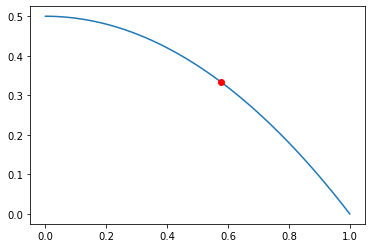

In [4]:
from scipy.optimize import fmin_slsqp
import numpy as np
import matplotlib.pyplot as plt


def objective(X):
    i, V = X
    return -i * V


def eqc(X):
    "equality constraint"
    i, V = X
    return (0.5 - 0.5 * V**2) - i


X0 = [0.2, 0.6]
X = fmin_slsqp(objective, X0, eqcons=[eqc])

imax, Vmax = X


V = np.linspace(0, 1)


def i(V):
    return 0.5 - 0.5 * V**2


plt.plot(V, i(V), Vmax, imax, "ro");

You can see the maximum power is approximately 0.2 (unspecified units), at the conditions indicated by the red dot in the figure above.



## Using Lagrange multipliers in optimization



[Matlab post](http://matlab.cheme.cmu.edu/2011/12/24/using-lagrange-multipliers-in-optimization/)  (adapted from [http://en.wikipedia.org/wiki/Lagrange_multipliers](http://en.wikipedia.org/wiki/Lagrange_multipliers).)

Suppose we seek to maximize the function $f(x,y)=x+y$ subject to the constraint that $x^2 + y^2 = 1$. The function we seek to maximize is an unbounded plane, while the constraint is a unit circle. We want the maximum value of the circle, on the plane. We plot these two functions here.



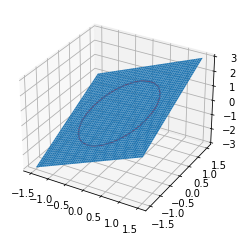

In [5]:
import numpy as np

x = np.linspace(-1.5, 1.5)

[X, Y] = np.meshgrid(x, x)

import matplotlib as mpl
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="3d")

ax.plot_surface(X, Y, X + Y)

theta = np.linspace(0, 2 * np.pi)
R = 1.0
x1 = R * np.cos(theta)
y1 = R * np.sin(theta)

ax.plot(x1, y1, x1 + y1, "r-");

### Construct the Lagrange multiplier augmented function



To find the maximum, we construct the following function: $\Lambda(x,y; \lambda) = f(x,y)+\lambda g(x,y)$ where $g(x,y) = x^2 + y^2 - 1 = 0$, which is the constraint function. Since $g(x,y)=0$, we are not really changing the original function, provided that the constraint is met!



In [6]:
import numpy as np


def func(X):
    x = X[0]
    y = X[1]
    L = X[2]  # this is the multiplier. lambda is a reserved keyword in python
    return x + y + L * (x**2 + y**2 - 1)

### Finding the partial derivatives



The minima/maxima of the augmented function are located where all of the partial derivatives of the augmented function are equal to zero, i.e. $\partial \Lambda/\partial x = 0$, $\partial \Lambda/\partial y = 0$, and $\partial \Lambda/\partial \lambda = 0$. the process for solving this is usually to analytically evaluate the partial derivatives, and then solve the unconstrained resulting equations, which may be nonlinear.

Rather than perform the analytical differentiation, here we develop a way to numerically approximate the partial derivatives.



In [7]:
def dfunc(X):
    dLambda = np.zeros(len(X))
    h = 1e-3  # this is the step size used in the finite difference.
    for i in range(len(X)):
        dX = np.zeros(len(X))
        dX[i] = h
        dLambda[i] = (func(X + dX) - func(X - dX)) / (2 * h)
    return dLambda

### Now we solve for the zeros in the partial derivatives



The function we defined above (dfunc) will equal zero at a maximum or minimum. It turns out there are two solutions to this problem, but only one of them is the maximum value. Which solution you get depends on the initial guess provided to the solver. Here we have to use some judgement to identify the maximum.



In [8]:
from scipy.optimize import fsolve

# this is the max
X1 = fsolve(dfunc, [1, 1, 0])
print(X1, func(X1))

# this is the min
X2 = fsolve(dfunc, [-1, -1, 0])
print(X2, func(X2))

[ 0.70710678  0.70710678 -0.70710678] 1.4142135623730951
[-0.70710678 -0.70710678  0.70710678] -1.414213562373095


### Summary



Three dimensional plots in matplotlib are a little more difficult than in Matlab (where the code is almost the same as 2D plots, just different commands, e.g. plot vs plot3). In Matplotlib you have to import additional modules in the right order, and use the object oriented approach to plotting as shown here.



## Linear programming example with inequality constraints



[Matlab post](http://matlab.cheme.cmu.edu/2011/10/21/linear-programming-example-with-inequality-constraints/)

adapted from [http://www.matrixlab-examples.com/linear-programming.html](http://www.matrixlab-examples.com/linear-programming.html>) which solves this problem with fminsearch.

Let us suppose that a merry farmer has 75 roods (4 roods = 1 acre) on which to plant two crops: wheat and corn. To produce these crops, it costs the farmer (for seed, water, fertilizer, etc. ) \\$120 per rood for the wheat, and \\$210 per rood for the corn. The farmer has \\$15,000 available for expenses, but after the harvest the farmer must store the crops while awaiting favorable or good market conditions. The farmer has storage space for 4,000 bushels. Each rood yields an average of 110 bushels of wheat or 30 bushels of corn. If the net profit per bushel of wheat (after all the expenses) is \\$1.30 and for corn is \\$2.00, how should the merry farmer plant the 75 roods to maximize profit?

Let $x$ be the number of roods of wheat planted, and $y$ be the number of roods of corn planted. The profit function is: $ P = (110)($1.3)x + (30)($2)y = 143x + 60y $

There are some constraint inequalities, specified by the limits on expenses, storage and roodage. They are:

$\$120x + \$210y <= \$15000$ (The total amount spent cannot exceed the amount the farm has)

$110x + 30y <= 4000$ (The amount generated should not exceed storage space.)

$x + y <= 75$ (We cannot plant more space than we have.)

$0 <= x$ and $0 <= y$ (all amounts of planted land must be positive.)

To solve this problem, we cast it as a linear programming problem, which minimizes a function f(X) subject to some constraints. We create a proxy function for the negative of profit, which we seek to minimize.

f = -(143\*x + 60\*y)



In [9]:
from scipy.optimize import fmin_cobyla


def objective(X):
    """objective function to minimize. It is the negative of profit,
    which we seek to maximize."""
    x, y = X
    return -(143 * x + 60 * y)


def c1(X):
    "Ensure 120x + 210y <= 15000"
    x, y = X
    return 15000 - 120 * x - 210 * y


def c2(X):
    "ensure 110x + 30y <= 4000"
    x, y = X
    return 4000 - 110 * x - 30 * y


def c3(X):
    "Ensure x + y is less than or equal to 75"
    x, y = X
    return 75 - x - y


def c4(X):
    "Ensure x >= 0"
    return X[0]


def c5(X):
    "Ensure y >= 0"
    return X[1]


X = fmin_cobyla(objective, x0=[20, 30], cons=[c1, c2, c3, c4, c5])

print("We should plant {0:1.2f} roods of wheat.".format(X[0]))
print("We should plant {0:1.2f} roods of corn".format(X[1]))
print("The maximum profit we can earn is ${0:1.2f}.".format(-objective(X)))

We should plant 21.88 roods of wheat.
We should plant 53.12 roods of corn
The maximum profit we can earn is $6315.62.


This code is not exactly the same as the original [post](http://matlab.cheme.cmu.edu/2011/10/21/linear-programming-example-with-inequality-constraints/), but we get to the same answer. The linear programming capability in scipy is currently somewhat limited in 0.10. It is a little better in 0.11, but probably not as advanced as Matlab. There are some external libraries available:

1.  [http://abel.ee.ucla.edu/cvxopt/](http://abel.ee.ucla.edu/cvxopt/)
2.  [http://openopt.org/LP](http://openopt.org/LP)



## Find the minimum distance from a point to a curve.



A problem that can be cast as a constrained minimization problem is to find the minimum distance from a point to a curve. Suppose we have $f(x) = x^2$, and the point (0.5, 2). what is the minimum distance from that point to $f(x)$?



The minimum distance is 0.86
dot(v1, v2) =  0.00033647721421425913


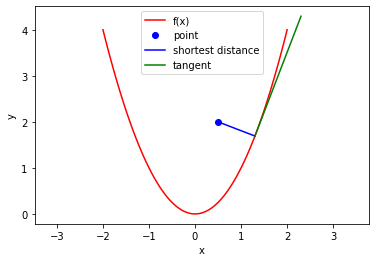

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fmin_cobyla

P = (0.5, 2)


def f(x):
    return x**2


def objective(X):
    x, y = X
    return np.sqrt((x - P[0]) ** 2 + (y - P[1]) ** 2)


def c1(X):
    x, y = X
    return f(x) - y


X = fmin_cobyla(objective, x0=[0.5, 0.5], cons=[c1])

print("The minimum distance is {0:1.2f}".format(objective(X)))

# Verify the vector to this point is normal to the tangent of the curve
# position vector from curve to point
v1 = np.array(P) - np.array(X)
# position vector
v2 = np.array([1, 2.0 * X[0]])
print("dot(v1, v2) = ", np.dot(v1, v2))

x = np.linspace(-2, 2, 100)

plt.plot(x, f(x), "r-", label="f(x)")
plt.plot(P[0], P[1], "bo", label="point")
plt.plot([P[0], X[0]], [P[1], X[1]], "b-", label="shortest distance")
plt.plot([X[0], X[0] + 1], [X[1], X[1] + 2.0 * X[0]], "g-", label="tangent")
plt.axis("equal")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="best");

In the code above, we demonstrate that the point we find on the curve that minimizes the distance satisfies the property that a vector from that point to our other point is normal to the tangent of the curve at that point. This is shown by the fact that the dot product of the two vectors is very close to zero. It is not zero because of the accuracy criteria that is used to stop the minimization is not high enough.

